In [1]:
#import libraries
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot
from xgboost import XGBRegressor, plot_importance
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
from collections import OrderedDict

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/dask/dataframe/utils.py:13: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#read data
df=pd.read_csv('data/listings_featured.csv')

In [3]:
df.drop(columns=['id','name', 'host_id', 'host_since'],inplace=True)
df.shape

(3583, 137)

In [4]:
for column in df.columns:
    if df[column].isnull().any()==True:
        print(column)

In [5]:
X = df.drop(columns=['price_log','price'],axis=1)
y = df['price_log']

In [6]:
#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42) 

In [7]:
 #Predict using your mode
    #Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42) 

lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit
y_test_preds = lm_model.predict(X_test)
y_train_preds = lm_model.predict(X_train)
#Score using your model
test_score = r2_score(y_test, y_test_preds)
train_score = r2_score(y_train, y_train_preds)

print(test_score)
print(train_score)

-1960.26500034877
0.7277694796850406


In [8]:
### decision tree 

In [9]:
tree = DecisionTreeRegressor(criterion='mse',max_depth=3)
tree.fit(X_train, y_train)
y_test_preds = tree.predict(X_test)
y_train_preds = tree.predict(X_train)

In [10]:
dfr = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_test_preds})

In [11]:
dfr.head()

,Real Values,Predicted Values
1407,3.688879,4.191709
411,4.094345,4.289246
802,5.247024,5.150496
3033,3.433987,3.860682
1546,4.174387,4.607833


In [12]:
# get importance
importance = tree.feature_importances_
# summarize feature importance
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance_val in zip(df.columns, importance):
    feats[feature] = importance_val #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})

In [13]:
importances[importances['Gini-importance']!=0]

,Gini-importance
bathrooms,0.032601
bedrooms,0.114259
price,0.017835
extra_people,0.013045
host_verifications_'weibo',0.035785
property_type_Townhouse,0.708611
property_type_Villa,0.077865


In [14]:
### XG_Boost

In [15]:
xgbr = XGBRegressor(verbosity=0) 

In [16]:
xgbr.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints='',
       learning_rate=0.300000012, max_delta_step=0, max_depth=6,
       min_child_weight=1, missing=nan, monotone_constraints='()',
       n_estimators=100, n_jobs=0, num_parallel_tree=1,
       objective='reg:squarederror', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
       validate_parameters=1, verbosity=0)

In [17]:
score = xgbr.score(X_train, y_train)  
print("Training score: ", score)

Training score:  0.9802989351506862


In [18]:
scores = cross_val_score(xgbr, X_train, y_train,cv=5)
print("Mean cross-validation score: %.2f" % scores.mean())

Mean cross-validation score: 0.66


In [19]:
kfold = KFold(n_splits=5, shuffle=True)
kf_cv_scores = cross_val_score(xgbr, X_train, y_train, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

K-fold CV average score: 0.68


In [20]:
y_pred = xgbr.predict(X_test)
y_pred=np.exp(y_pred)
y_test=np.exp(y_test)
mse = mean_squared_error(y_test, y_pred)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % (mse**(1/2.0)))



MSE: 6329.67
RMSE: 79.56


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/axes/_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


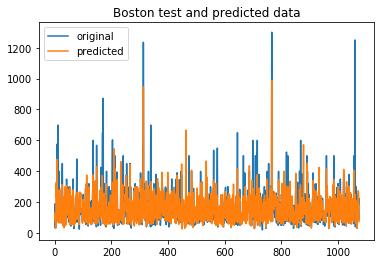

In [21]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.title("Boston test and predicted data")
plt.legend()
plt.show()

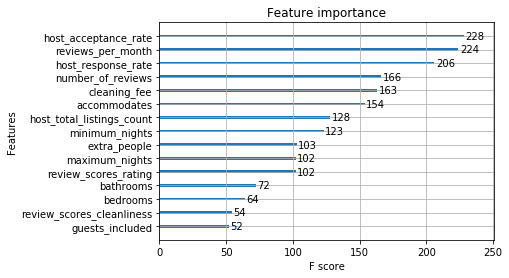

In [22]:
plot_importance(xgbr, max_num_features=15) # top 10 most important features
plt.show()

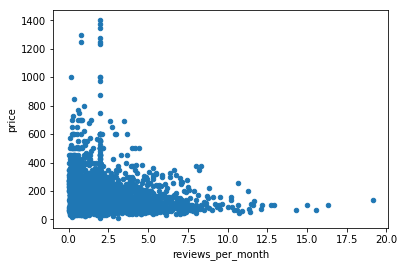

In [23]:
df.plot.scatter(x='reviews_per_month',y='price')


In [25]:
 #Predict using your mode
#Split into train and test
X_lr = df['neighbourhood_cleansed_Back Bay','neighbourhood_cleansed_Bay Village'
neighbourhood_cleansed_Beacon Hill
neighbourhood_cleansed_Brighton
neighbourhood_cleansed_Charlestown
neighbourhood_cleansed_Chinatown
neighbourhood_cleansed_Dorchester
neighbourhood_cleansed_Downtown
neighbourhood_cleansed_East Boston
neighbourhood_cleansed_Fenway
neighbourhood_cleansed_Hyde Park
neighbourhood_cleansed_Jamaica Plain
neighbourhood_cleansed_Leather District
neighbourhood_cleansed_Longwood Medical Area
neighbourhood_cleansed_Mattapan
neighbourhood_cleansed_Mission Hill
neighbourhood_cleansed_North End
neighbourhood_cleansed_Roslindale
neighbourhood_cleansed_Roxbury
neighbourhood_cleansed_South Boston
neighbourhood_cleansed_South Boston Waterfront
neighbourhood_cleansed_South End
neighbourhood_cleansed_West End
neighbourhood_cleansed_West Roxbury]
y_lr = df['price_log']
X_lr_train, X_lr_test, y_lr_train, y_lr_test = train_test_split(X_lr, y_lr, test_size = .30, random_state=21) 

lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_lr_train, y_train) #Fit
y_test_preds = lm_model.predict(X_test)
y_train_preds = lm_model.predict(X_train)
#Score using your model
test_score = r2_score(y_test, y_test_preds)
train_score = r2_score(y_train, y_train_preds)

print(test_score)
print(train_score)

SyntaxError: invalid syntax (<ipython-input-25-9dc97cbe81cf>, line 4)